In [1]:
# Get miscellaneous system information
import os
import sys

# Returns the current conda environment if found, 'None' if not found
def get_conda_env():
    sp = sys.path[1].split('/')
    if 'envs' in sp:
        return sp[sp.index("envs") + 1]
    else:
        return None
# Get the current Anaconda Environment name
conda_env = get_conda_env()
print("Anaconda Environment: {}\n".format(conda_env))

# Get the Python version that is currently running
python_version = sys.version
print("Python Version: {}\n".format(python_version))

# Get the path to the project folder
project_path = os.getcwd()
print("project folder path: {}\n".format(project_path))

# Print out the number of items in the project folder
print("There are {0} items in the project folder:\n".format(len(os.listdir())))
for item in os.listdir():
     print(" - ", item)

Anaconda Environment: P5

Python Version: 3.5.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:11:22) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

project folder path: /Users/ty/Udacity/T1/P5_vehicle_detection_and_tracking

There are 18 items in the project folder:

 -  P5_vehicle_detection_and_tracking.ipynb
 -  test_images
 -  bbox-example-image.jpg
 -  output_images
 -  LICENSE
 -  project_video.mp4
 -  launch_P5.sh
 -  README.md
 -  .gitignore
 -  examples
 -  writeup_template.md
 -  numpy_basics.py
 -  .ipynb_checkpoints
 -  bbox-example-image-out.jpg
 -  .git
 -  lecture_notes.ipynb
 -  draw_boxes.py
 -  test_video.mp4


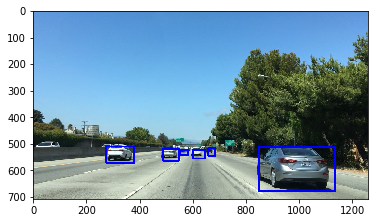

In [4]:
# Section 5
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline

image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    draw_img = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img

# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()


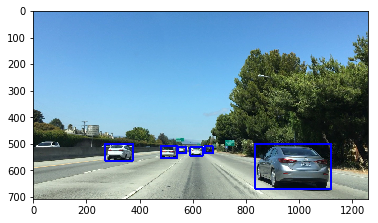

In [5]:
# Section 9
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutouts/cutout1.jpg', 'cutouts/cutout2.jpg', 'cutouts/cutout3.jpg',
            'cutouts/cutout4.jpg', 'cutouts/cutout5.jpg', 'cutouts/cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list



bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

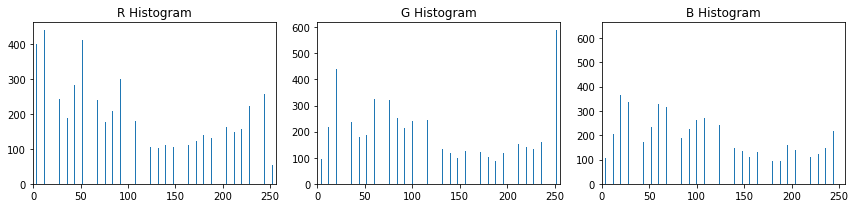

In [11]:
# Section 12
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutouts/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
  
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

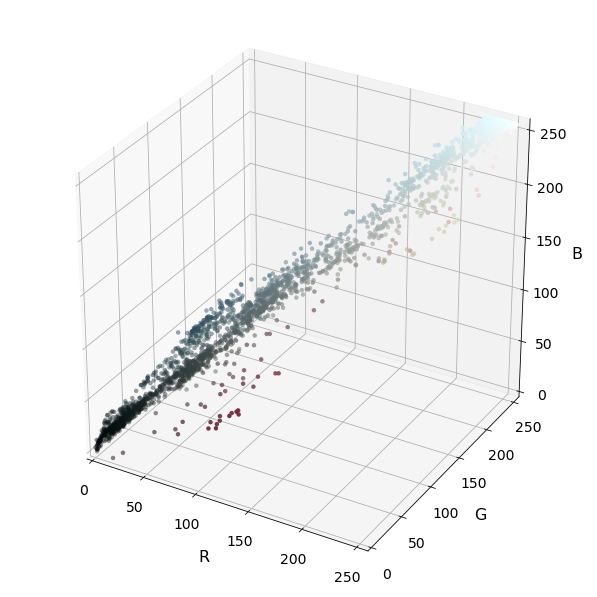

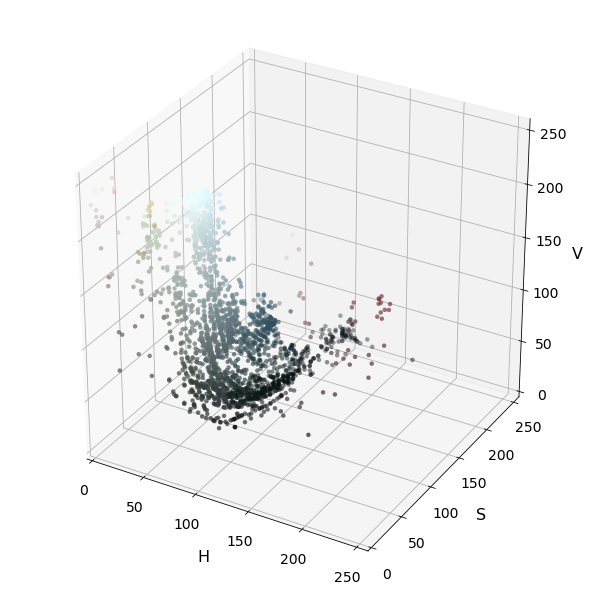

In [12]:
# Section 15
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
#img = cv2.imread("000275.png")
img = cv2.imread("cutouts/cutout1.jpg")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

In [ ]:
# # Resize an image
# import cv2
# import matplotlib.image as mpimg

# image = mpimg.imread('test_img.jpg')
# small_img = cv2.resize(image, (32, 32))
# print(small_img.shape)
# (32, 32, 3)

(3072,)


Text(0.5,1,'Spatially Binned Features')

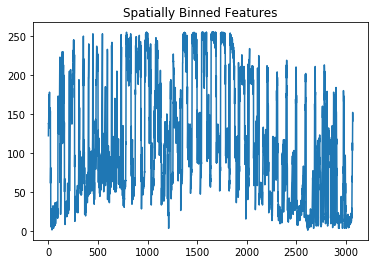

In [14]:
# Section 16
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
# You can also read cutout2, 3, 4 etc. to see other examples
image = mpimg.imread('cutouts/cutout1.jpg')

# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
    
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))
print(feature_vec.shape)


# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

In [37]:
# Create a (2,3,3) array
a = np.array([[[1,2,3],[4,5,6],[7,8,9]],
              [[0,0,0],[0,0,0],[0,0,0]]], dtype='uint8')
print(a.shape)
print(a)
print("---------------------------------")
# a_raveled = a.ravel()
# print(a_raveled.shape)
# print(a_raveled)
# print(a)
# print("---------------------------------")

# Flatten the (2,3,3) array into a (18,) array
a_flattened = a.flatten()#<-- always returns a copy (probably want to use this one)
print(a_flattened.shape)
print(a_flattened)
print(a)
print("---------------------------------")

# Un-flatten the (18,) array back into a (2,3,3) array
a_reshaped = a_flattened.reshape((2,3,3))
print(a_reshaped.shape)
print(a_reshaped)


(2, 3, 3)
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
---------------------------------
(18,)
[1 2 3 4 5 6 7 8 9 0 0 0 0 0 0 0 0 0]
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
---------------------------------
(2, 3, 3)
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]
